# Problem 1

$$\min_{x} c^T x$$
S.T. $$F(x)\leq 0$$

We are going to use barier method.
Thus we want to find:

$$\min_{t, x} tc^Tx - \sum_{i} log(-F_i(x))$$

In [59]:
import numpy as np
import scipy as sp
import scipy.optimize

class NewtonSolver():
    def __init__(self):
        self.epsilon = 1e-3
        self.gamma = 0.5
        
    def solve(self, f, x0, hessian, jacobian):
        def regularization_vector():
            return self.epsilon * np.ones(x0.shape[0])

        x_old = x0
        
        while True:
            x_new = x_old - self.gamma * np.linalg.inv(hessian(x_old) + regularization_vector()).dot(jacobian(x_old))

            i = 2
            while f(x_new) == np.inf:
                x_new = x_old - (self.gamma ** i) * np.linalg.inv(hessian(x_old) + regularization_vector()).dot(jacobian(x_old))
                i += 1

            if np.linalg.norm(x_new - x_old) < self.epsilon:
                break
                
            x_old = x_new
        return x_new
        

class IPSolver():
    def __init__(self):
        self.mu = 2
        self.epsilon = 1e-3
        self.x0 = np.array([0, 0]).T
        self.newton = NewtonSolver()
    
    # It is assumed that Ax <= b is the form of inequality constraints for the problem
    # A is 2x2 matrix x is (x1, x2)
    # the problem was given in the form of min c^T x
    def solve(self, c, A, b, callback = None):
        t = 1
        
        def jacobian(t):
            def function(x):
                J = np.zeros(A.shape[1])

                for j in range(A.shape[1]):
                    J[j] = t * c[j] 
                    
                    for i in range(A.shape[0]):
                        J[j] += A[i, j] / (b[i] - A[i].dot(x.T))

                return J

            return function
        
        def hessian():
            def function(x):
                H = np.zeros((A.shape[1], A.shape[1]))
                
                for i in range(A.shape[0]):
                    H[0, 0] += (A[i, 0] / (A[i].dot(x.T) - b[i])) ** 2
                    
                for i in range(A.shape[0]):
                    H[1, 1] += (A[i, 1] / (A[i].dot(x.T) - b[i])) ** 2
                    
                for i in range(A.shape[0]):
                    H[0, 1] += A[i, 0] * A[i, 1] / (A[i].dot(x.T) - b[i]) ** 2
                    H[1, 0] += A[i, 0] * A[i, 1] / (A[i].dot(x.T) - b[i]) ** 2

                return H

            return function
        
        def fi(x):
            return A.dot(x) - b
        
        def f(x):
            return c.T.dot(x)
        
        def barrier_function(t):
            def function(x):
                f_val = t * f(x)
                
                if (fi(x) > 0).any():
                    f_val = np.inf
                else:
                    f_val -= np.sum(np.log(-fi(x)))
                
                return f_val
            
            return function
        
        x_old = self.x0
        
        if callback:
            callback(x_old)
            
        while True:
            x_new = self.newton.solve(barrier_function(t), x_old, hessian(), jacobian(t))
            
            if np.linalg.norm(x_new - x_old) < self.epsilon:
                break

            if callback:
                callback(x_new)
                
            t *= self.mu
            x_old = x_new
                
        return x_new

/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


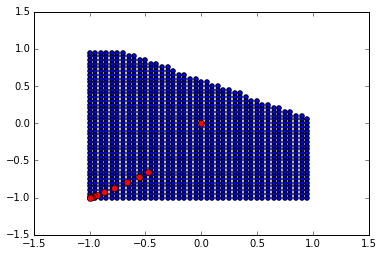

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)
c = np.random.random(2)
A = np.random.random((4, 2))
b = np.random.random(4)

A = np.vstack((A, np.array([1, 0])))
A = np.vstack((A, np.array([-1, 0])))
A = np.vstack((A, np.array([0, -1])))
A = np.vstack((A, np.array([0, 1])))

b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))

traj_x1 = []
traj_x2 = []

def track(x):
    traj_x1.append(x[0])
    traj_x2.append(x[1])

solver = IPSolver()
X = solver.solve(c, A, b, track)

plt.plot(traj_x1, traj_x2, 'ro')

x1, x2 = np.mgrid[-1:1:0.05, -1:1:0.05]
x1 = x1.reshape(-1)
x2 = x2.reshape(-1)

X1 = []
X2 = []

for i in range(x1.shape[0]):
    constr = A.dot(np.array([x1[i], x2[i]])) - b
    if constr[constr > 0].any():
        continue
    else:
        X1.append(x1[i])
        X2.append(x2[i])

plt.scatter(X1, X2)

/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


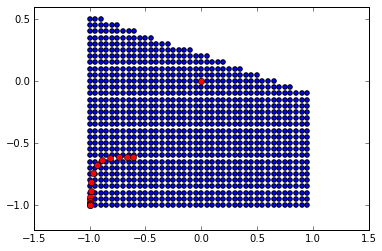

In [61]:
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(2)
c = np.random.random(2)
A = np.random.random((4, 2))
b = np.random.random(4)

A = np.vstack((A, np.array([1, 0])))
A = np.vstack((A, np.array([-1, 0])))
A = np.vstack((A, np.array([0, -1])))
A = np.vstack((A, np.array([0, 1])))

b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))

traj_x1 = []
traj_x2 = []

def track(x):
    traj_x1.append(x[0])
    traj_x2.append(x[1])

solver = IPSolver()
X = solver.solve(c, A, b, track)

plt.plot(traj_x1, traj_x2, 'ro')

x1, x2 = np.mgrid[-1:1:0.05, -1:1:0.05]
x1 = x1.reshape(-1)
x2 = x2.reshape(-1)

X1 = []
X2 = []

for i in range(x1.shape[0]):
    constr = A.dot(np.array([x1[i], x2[i]])) - b
    if constr[constr > 0].any():
        continue
    else:
        X1.append(x1[i])
        X2.append(x2[i])

plt.scatter(X1, X2)

/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


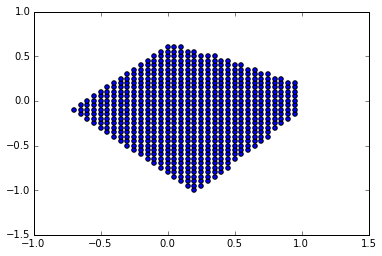

In [70]:
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)
c = np.random.random(2)
A = np.random.random((8, 2)) - 0.5
b = np.random.random(8)

A = np.vstack((A, np.array([1, 0])))
A = np.vstack((A, np.array([-1, 0])))
A = np.vstack((A, np.array([0, -1])))
A = np.vstack((A, np.array([0, 1])))

b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))
b = np.hstack((b, np.array([1])))

traj_x1 = []
traj_x2 = []

def track(x):
    traj_x1.append(x[0])
    traj_x2.append(x[1])

# solver = IPSolver()
# X = solver.solve(c, A, b, track)

# plt.plot(traj_x1, traj_x2, 'ro')

x1, x2 = np.mgrid[-1:1:0.05, -1:1:0.05]
x1 = x1.reshape(-1)
x2 = x2.reshape(-1)

X1 = []
X2 = []

for i in range(x1.shape[0]):
    constr = A.dot(np.array([x1[i], x2[i]])) - b
    if constr[constr > 0].any():
        continue
    else:
        X1.append(x1[i])
        X2.append(x2[i])

plt.scatter(X1, X2)

In [69]:
A

array([[ 0.23199394,  0.09865848],
       [-0.34398136, -0.34400548],
       [-0.44191639,  0.36617615],
       [ 0.10111501,  0.20807258],
       [-0.47941551,  0.46990985],
       [ 0.33244264, -0.28766089],
       [-0.31817503, -0.31659549],
       [-0.19575776,  0.02475643],
       [ 1.        ,  0.        ],
       [-1.        ,  0.        ],
       [ 0.        , -1.        ],
       [ 0.        ,  1.        ]])